# Introduction and Prerequisites

I want to see if decision trees are a better method to predict delinquencies in the creditdefault dataset compared to a Neural Network created with PyTorch.

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score as cvs
import sklearn.ensemble as en
import sklearn.tree as tree

We import the necessary libraries to allow us to create and evaluate the models:
* Pandas - stores and imports data
* Matplotlib - to display the confusion matrix
* Sklearn.metrics - to get metrics to evaluate the dataset; to access the confusion matrix class
* Sklearn.tree - to create a decision tree model
* Sklearn.ensemble - to create other tree models

# Importing and preprocessing the dataset

In [2]:
train = pd.read_csv('data/creditdefault_train.csv')
test = pd.read_csv('data/creditdefault_test.csv')

In [3]:
trainX, trainY = train.drop('Y',axis=1),train['Y']
testX, testY = test.drop('Y',axis=1),test['Y']

We import the testing and training sets and split the features from the targets.

# Creating model functions

### Metrics

plotConfusionMatrix will print a confusion matrix from the test data, allowing us to see the predictions of each model made, while getMetrics will allow us to see the metrics of each model.

In [4]:
def plotConfusionMatrix(actual,predicted):
    cMatrix = metrics.confusion_matrix(actual,predicted)
    cMDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix=cMatrix, display_labels=['Not a Defaulter','Defaulter'])
    cMDisplay.plot()
    plt.show()
    
def getMetrics(actual,predicted):
    accuracy = metrics.accuracy_score(actual,predicted)*100
    precision = metrics.precision_score(actual,predicted)*100
    recall = metrics.recall_score(actual,predicted)*100
    specificity = metrics.recall_score(actual,predicted,pos_label=0)*100
    
    print(f'ACCURACY - {accuracy}% of samples accurately predicted')
    print(f'PRECISION = {precision}% of positive predicted samples are positive')
    print(f'RECALL - {recall}% of positive samples were predicted as positive')
    print(f'SPECIFICITY - {specificity}% of negative samples were predicted as negative')

### Model creation and evaluation

These three functions will be able to take a classifier, fit it on the training data, test it with the testing data and call the metrics functions to display the performance of the given model.

In [5]:
def testModel(model,X,y):
    y_pred = model.predict(X)
    
    plotConfusionMatrix(y,y_pred)
    getMetrics(y,y_pred)
    
def fitModel(model,X,y):
    model.fit(X,y)
    #print('Cross Validation Score (5 Folds):',cvs(model(X,y)))
    return model
    
def runModel(model,trainX,trainY,testX,testY):
    model = fitModel(model,trainX,trainY)
    testModel(model,testX,testY)
    
    return model

# Running Models

### Decision Trees

A decision tree is a single tree that attempts to classify a sample. It uses the gini coefficient to split samples at decision points until a leaf only has samples in one class.

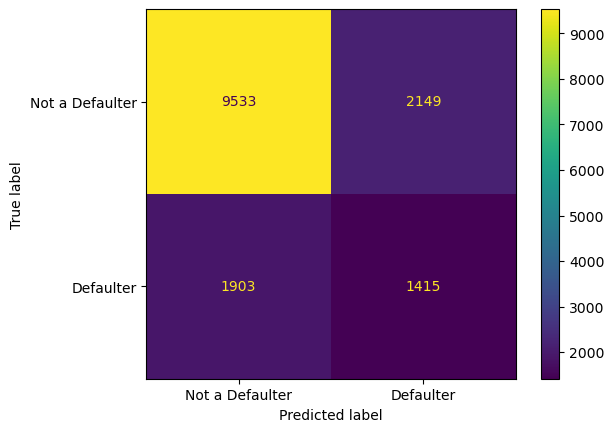

ACCURACY - 72.98666666666666% of samples accurately predicted
PRECISION = 39.70258136924804% of positive predicted samples are positive
RECALL - 42.64617239300784% of positive samples were predicted as positive
SPECIFICITY - 81.60417736688923% of negative samples were predicted as negative


In [6]:
dT = runModel(tree.DecisionTreeClassifier(),trainX,trainY,testX,testY)

### Random Forests

Random Forests are a 'forest' of multiple trees created from bootstrap sampling the dataset. The classification is decided by a majority vote of all the trees.

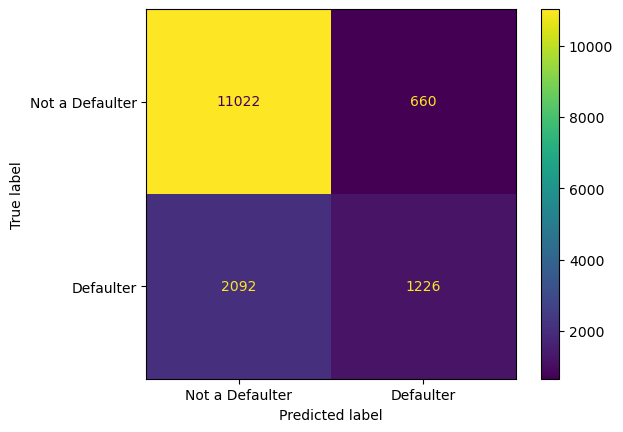

ACCURACY - 81.65333333333334% of samples accurately predicted
PRECISION = 65.00530222693531% of positive predicted samples are positive
RECALL - 36.94996986136226% of positive samples were predicted as positive
SPECIFICITY - 94.35028248587571% of negative samples were predicted as negative


In [8]:
rF = runModel(en.RandomForestClassifier(),trainX,trainY,testX,testY)

rF has better accuracy and precision than dT, but a lower recall rate. It is worse at predicting delinquencies.

### Extremely Randomised Trees

ERTs are like Random Forests, except the trees are made from a subset of features, not samples. It is hoped that this improves accuracy by reducing variance from reduced influence from certain patterns in the dataset.

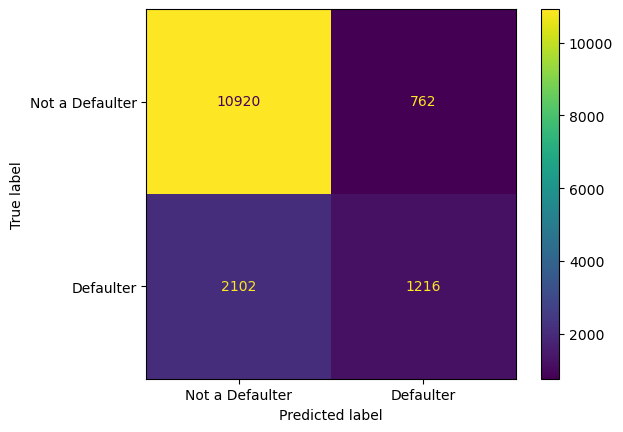

ACCURACY - 80.90666666666667% of samples accurately predicted
PRECISION = 61.476238624873616% of positive predicted samples are positive
RECALL - 36.64858348402652% of positive samples were predicted as positive
SPECIFICITY - 93.47714432460195% of negative samples were predicted as negative


In [9]:
eF = runModel(en.ExtraTreesClassifier(),trainX,trainY,testX,testY)

Model eF performs slightly worse across all metrics compared to rF.

### Adaptive Boosting

AdaBoost attempts to make a stronger classifier out of weaker classififers (models that can't distiguish between classes), by progressively learning from them.

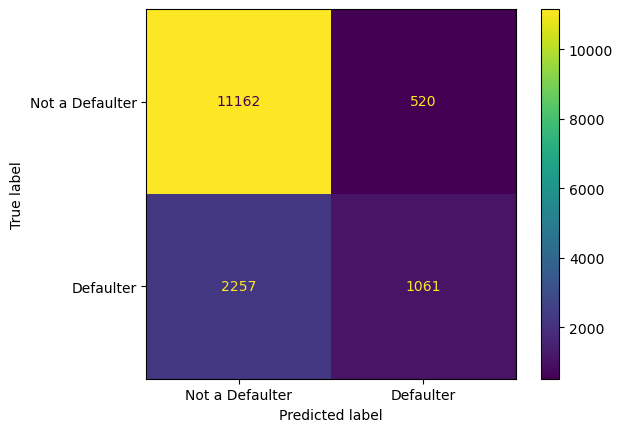

ACCURACY - 81.48666666666666% of samples accurately predicted
PRECISION = 67.10942441492726% of positive predicted samples are positive
RECALL - 31.977094635322484% of positive samples were predicted as positive
SPECIFICITY - 95.5487074131142% of negative samples were predicted as negative


In [10]:
aB = runModel(en.AdaBoostClassifier(),trainX,trainY,testX,testY)

Not using a base estimator means that the 'weaker' models will be decision tree stumps. In this case, the model performs worse than a regular binary tree in terms of recall, but better in terms of precision - the model is better able to detect non-delinquencies, but worse at delinquencies.

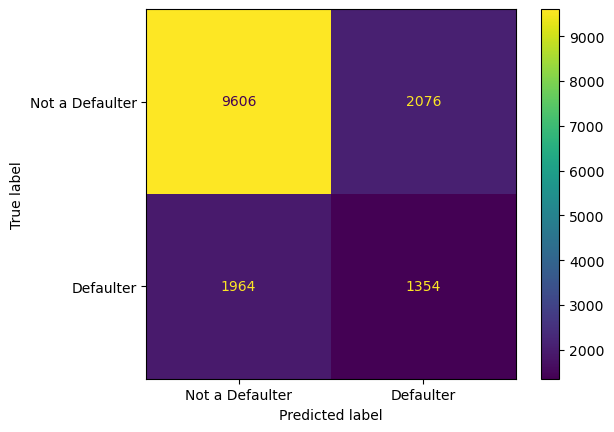

ACCURACY - 73.06666666666666% of samples accurately predicted
PRECISION = 39.47521865889213% of positive predicted samples are positive
RECALL - 40.80771549125979% of positive samples were predicted as positive
SPECIFICITY - 82.22907036466358% of negative samples were predicted as negative


In [7]:
aB1 = runModel(en.AdaBoostClassifier(estimator=dT),trainX,trainY,testX,testY)

By using our decision tree model dT as our estimator, the recall increases but it is still worse than dT. The precision is the same as dT, but worse than aB.

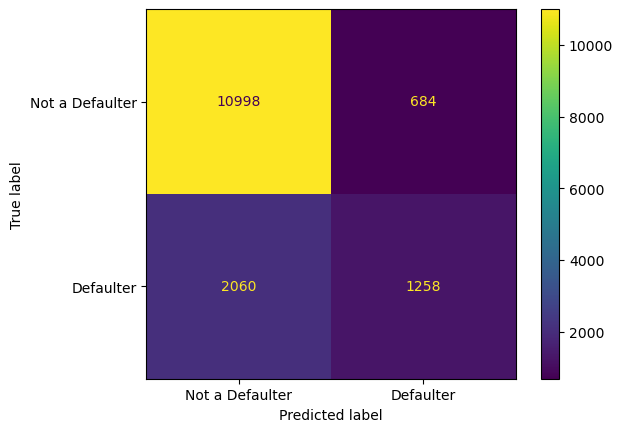

ACCURACY - 81.70666666666668% of samples accurately predicted
PRECISION = 64.77857878475798% of positive predicted samples are positive
RECALL - 37.91440626883665% of positive samples were predicted as positive
SPECIFICITY - 94.14483821263482% of negative samples were predicted as negative


In [11]:
aB2 = runModel(en.AdaBoostClassifier(estimator=rF),trainX,trainY,testX,testY)

By using model rF as our estimator, every metric except for recall improves over model aB1, however, this means our model is less suited for our task.

### Gradient Boosting

Gradient Boosting works similarly to AdaBoost, however, you cannot pass a base estimator into the sci-kit interpretation. Additionally, the features are more generic than AdaBoost, meaning the boosting is more flexible.

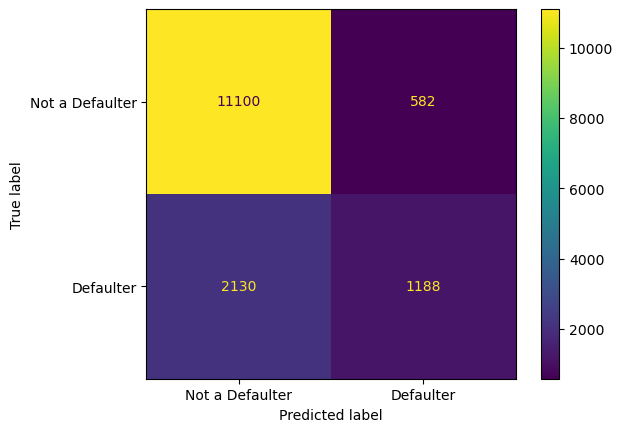

ACCURACY - 81.92% of samples accurately predicted
PRECISION = 67.11864406779661% of positive predicted samples are positive
RECALL - 35.80470162748644% of positive samples were predicted as positive
SPECIFICITY - 95.01797637390858% of negative samples were predicted as negative


In [12]:
gB = runModel(en.GradientBoostingClassifier(),trainX,trainY,testX,testY)

Model gB has the best some of the best metrics out of all the models, except for the recall score, which ranks among the worst.

# Conclusion

Out of all these models, model dT would be best suited for predicting deliquencies as it has the highest recall rate.

However, none of these models based on trees detected defaulters at a better rate than the neural network, even if the overall accuracy across the whole testing dataset was better. Based on the objective of the network, the neural network would probably be the best option to use, since it more accurately predicts defaulters, even at the cost of overall accuracy.